<a href="https://colab.research.google.com/github/kalakhushi18/Machine-Learning-Projects/blob/dev/ML_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data source code:
https://github.com/nachi-hebbar/Time-Series-Forecasting-MachineLearning/blob/main/Alcohol_Sales.csv


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/sample_data/Alcohol_Sales.csv', parse_dates= True, index_col= 'DATE')
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


Comverting time series data into supervised machine learning input, thus have to create input and output

In [4]:
df.columns = ['Sales']
df

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


<Axes: xlabel='DATE'>

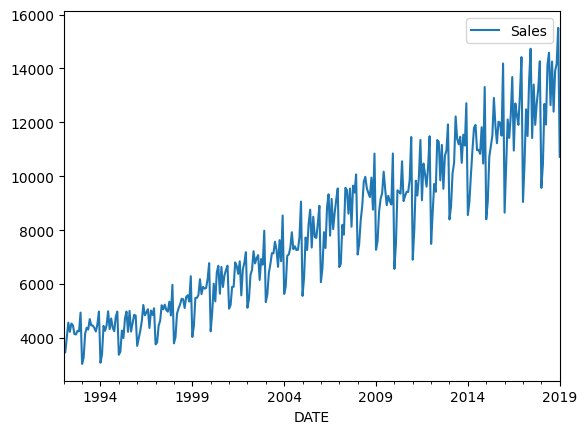

In [5]:
df.plot()

Predicting the sales of current month on the basis of previous month,
Here we can find the order how many previous months has to be considered like using pacf or acf and then find how many values we will need

In [6]:
df['Sale_LastMonth']=df['Sales'].shift(+1)  # shifting values 1 row down, thus having previous month values
df['Sale_2Monthsback']=df['Sales'].shift(+2)
df['Sale_3Monthsback']=df['Sales'].shift(+3)
df

,Sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
DATE,,,,
1992-01-01,3459,NaN,NaN,NaN
1992-02-01,3458,3459.0,NaN,NaN
1992-03-01,4002,3458.0,3459.0,NaN
1992-04-01,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4564.0,4002.0,3458.0
...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0
2018-10-01,13914,12396.0,14257.0,12640.0
2018-11-01,14174,13914.0,12396.0,14257.0


In [7]:
df.dropna(inplace = True)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Data Preprocessing

In [32]:
X = df.loc[:, ['Sale_LastMonth','Sale_2Monthsback', 'Sale_3Monthsback']]
Y = df.loc[:,'Sales']


In [38]:
X

,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
0,4002.0,3458.0,3459.0
1,4564.0,4002.0,3458.0
2,4221.0,4564.0,4002.0
3,4529.0,4221.0,4564.0
4,4466.0,4529.0,4221.0
...,...,...,...
317,14257.0,12640.0,14583.0
318,12396.0,14257.0,12640.0
319,13914.0,12396.0,14257.0
320,14174.0,13914.0,12396.0


In [33]:
X.reset_index(drop = True, inplace= True)

In [34]:
Y.reset_index(drop= True, inplace= True)
Y

,Sales
0,4564
1,4221
2,4529
3,4466
4,4137
...,...
317,12396
318,13914
319,14174
320,15504


In [9]:
# this is necessary
x1,x2,x3,y=df['Sale_LastMonth'],df['Sale_2Monthsback'],df['Sale_3Monthsback'],df['Sales']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[ 4002.  3458.  3459.]
 [ 4564.  4002.  3458.]
 [ 4221.  4564.  4002.]
 [ 4529.  4221.  4564.]
 [ 4466.  4529.  4221.]
 [ 4137.  4466.  4529.]
 [ 4126.  4137.  4466.]
 [ 4259.  4126.  4137.]
 [ 4240.  4259.  4126.]
 [ 4936.  4240.  4259.]
 [ 3031.  4936.  4240.]
 [ 3261.  3031.  4936.]
 [ 4160.  3261.  3031.]
 [ 4377.  4160.  3261.]
 [ 4307.  4377.  4160.]
 [ 4696.  4307.  4377.]
 [ 4458.  4696.  4307.]
 [ 4457.  4458.  4696.]
 [ 4364.  4457.  4458.]
 [ 4236.  4364.  4457.]
 [ 4500.  4236.  4364.]
 [ 4974.  4500.  4236.]
 [ 3075.  4974.  4500.]
 [ 3377.  3075.  4974.]
 [ 4443.  3377.  3075.]
 [ 4261.  4443.  3377.]
 [ 4460.  4261.  4443.]
 [ 4985.  4460.  4261.]
 [ 4324.  4985.  4460.]
 [ 4719.  4324.  4985.]
 [ 4374.  4719.  4324.]
 [ 4248.  4374.  4719.]
 [ 4784.  4248.  4374.]
 [ 4971.  4784.  4248.]
 [ 3370.  4971.  4784.]
 [ 3484.  3370.  4971.]
 [ 4269.  3484.  3370.]
 [ 3994.  4269.  3484.]
 [ 4715.  3994.  4269.]
 [ 4974.  4715.  3994.]
 [ 4223.  4974.  4715.]
 [ 5000.  4223. 

In [39]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]
# X_train,X_test,y_train,y_test=X[:-30],X[-30:],Y[:-30],Y[-30:]
# X_train

In [28]:
y_train

,Sales
0,4564
1,4221
2,4529
3,4466
4,4137
...,...
287,12107
288,11420
289,12238
290,13681


In [40]:
model.fit(X_train, y_train)


LinearRegression()

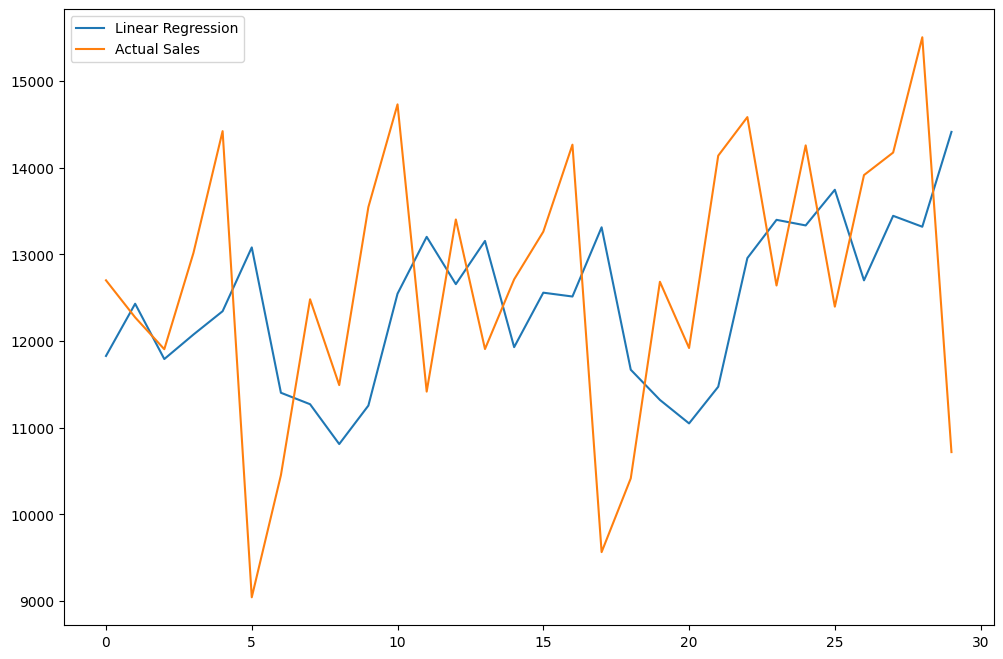

In [41]:
pred = model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Linear Regression')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()


In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
print("RMSE: ", rmse_rf)

RMSE:  1791.496523275983
